In [1]:
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib .pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Look at the columns in the Station table
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Look at the columns in the Measurements table
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

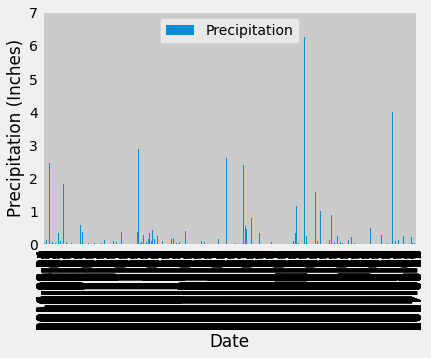

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_years_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
last_years_prcp_df = pd.DataFrame(last_years_prcp, columns = ["Date", "Precipitation"])

last_years_prcp_df.set_index("Date", inplace = True)

# Sort the dataframe by date
last_years_prcp_df = last_years_prcp_df.sort_values(by=["Date"])


# Use Pandas Plotting with Matplotlib to plot the data

last_years_prcp_df = last_years_prcp_df.dropna()
last_years_prcp_df.plot.bar()
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.show()

In [14]:
last_years_prcp_df

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_years_prcp_df["Precipitation"].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query((Measurement.station), func.count(Measurement.date)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.date).\
                desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#Query the lowest temperature:
lowest_temperature = session.query(Measurement.station , func.min(Measurement.tobs)).\
        filter(Measurement.station == 'USC00519281').all()
#Query the highest temperature:
highest_temperature = session.query(Measurement.station , func.max(Measurement.tobs)).\
        filter(Measurement.station == 'USC00519281').all()
#Query the average temperature:
average_temperature = session.query(Measurement.station , func.avg(Measurement.tobs)).\
        filter(Measurement.station == 'USC00519281').all()

#Print the temperatures ([0][1] returns the temperature from the list of items from the query)
print(f"The lowest temperature at station {lowest_temperature[0][0]} was {lowest_temperature[0][1]}°F")
print(f"The highest temperature at station {highest_temperature[0][0]} was {highest_temperature[0][1]}°F")
print(f"The average temperature at station {average_temperature[0][0]} was {round(average_temperature[0][1],2)}°F")

The lowest temperature at station USC00519281 was 54.0°F
The highest temperature at station USC00519281 was 85.0°F
The average temperature at station USC00519281 was 71.66°F


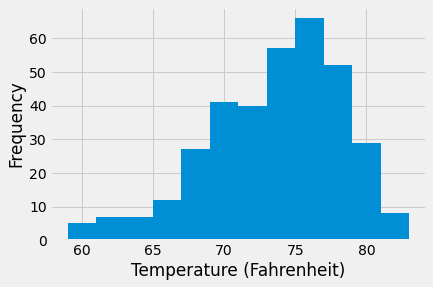

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the date and temperature data
USC00519281_last_years_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > year_ago).\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
USC00519281_last_years_temp_df = pd.DataFrame(USC00519281_last_years_temp, columns = ["Date", "Temperature"])
USC00519281_last_years_temp_df.set_index("Date", inplace = True)

# Sort the dataframe by date
USC00519281_last_years_temp_df = USC00519281_last_years_temp_df.sort_values(by=["Date"])

# Use Pandas Plotting with Matplotlib to plot the data
plt.hist(USC00519281_last_years_temp_df["Temperature"], bins = 12)
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Frequency")
plt.show()


# Close session

In [33]:
# Close Session
session.close()